In [1]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

In [2]:
jet_model = pyqg.QGModel(nx=128, dt=1800, tmax=311040000.0, twrite=10000, tavestart=155520000.0, rek=7e-08, delta=0.1, beta=1e-11) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


## Run initial simulation

In [3]:
# run simulation to gather data initially

## From here, you can call .run() to run a new simulation
jet_model.run()

## Convert to xarray Datasets
jet_model_highRes = jet_model.to_dataset()

INFO: Step: 10000, Time: 1.80e+07, KE: 1.23e-07, CFL: 0.006
INFO: Step: 20000, Time: 3.60e+07, KE: 1.83e-07, CFL: 0.006
INFO: Step: 30000, Time: 5.40e+07, KE: 4.66e-07, CFL: 0.006
INFO: Step: 40000, Time: 7.20e+07, KE: 1.68e-06, CFL: 0.006
INFO: Step: 50000, Time: 9.00e+07, KE: 7.14e-06, CFL: 0.006
INFO: Step: 60000, Time: 1.08e+08, KE: 3.27e-05, CFL: 0.010
INFO: Step: 70000, Time: 1.26e+08, KE: 1.56e-04, CFL: 0.021
INFO: Step: 80000, Time: 1.44e+08, KE: 2.76e-04, CFL: 0.039
INFO: Step: 90000, Time: 1.62e+08, KE: 2.44e-04, CFL: 0.053
INFO: Step: 100000, Time: 1.80e+08, KE: 2.40e-04, CFL: 0.046
INFO: Step: 110000, Time: 1.98e+08, KE: 2.46e-04, CFL: 0.046
INFO: Step: 120000, Time: 2.16e+08, KE: 2.41e-04, CFL: 0.044
INFO: Step: 130000, Time: 2.34e+08, KE: 2.21e-04, CFL: 0.042
INFO: Step: 140000, Time: 2.52e+08, KE: 2.35e-04, CFL: 0.044
INFO: Step: 150000, Time: 2.70e+08, KE: 2.27e-04, CFL: 0.045
INFO: Step: 160000, Time: 2.88e+08, KE: 2.37e-04, CFL: 0.044
INFO: Step: 170000, Time: 3.06e+0

In [4]:
# after initial run, generate snapshots of model

def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

jet_model_highRes = generate_snapshots(jet_model)
jet_model_highRes

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 128, x: 128, l: 128, k: 65,
                        lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * y                  (y) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0003958 0.0004021
Data variables: (12/32)
    q                  (time, lev, y, x) float64 -5.492e-06 ... 4.035e-07
    u                  (time, lev, y, x) float64 -0.04364 -0.03885 ... -0.008896
    v                  (time, lev, y, x) float64 -0.002986 -0.002704 ... 0.00218
    ufull              (time, lev, y, x) float64 -0.01864 -0.01385 ... -0.008896
    vfull              (time, lev, y, x) float64 -0.002986 -0.002704 ... 0.00218
    qh                 (time, lev, l, k) complex128 (0.008803847878681286+0j)...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 -9.74e-24 ... 5.556e-66
    ENSfrictionspec    (time, l, k) float64 0.0 -1.505e-25 ... -9.763e-65
    APEgenspec         (time, l, k) float64 0.0 -2.192e-15 ... 1.25e-57
    APEflux            (time, l, k) float64 -0.0 1.334e-15 ... 9.413e-38
    KEflux             (time, l, k) float64 0.0 1.554e-15 ... 1.427e-32 4.43e-35
    APEgen             (time) float64 9.26e-12
Attributes: (12/23)
    pyqg:beta:       1e-11
    pyqg:delta:      0.1
    pyqg:del2:       0.9090909090909091
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [5]:
# write data to scratch bucket after initial run

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
jet_model_highRes.to_zarr('gs://leap-scratch/panalluri/jet/highRes.zarr')  # write data

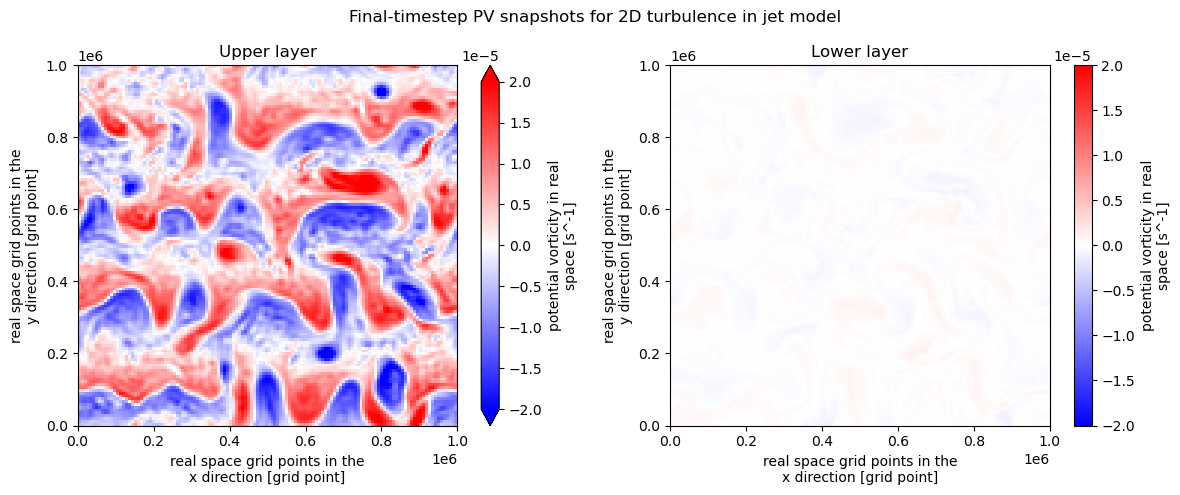

In [6]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep PV snapshots for 2D turbulence in jet model")
plt.subplot(121); jet_model_highRes.q.isel(lev=0, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title("Upper layer")
plt.subplot(122); jet_model_highRes.q.isel(lev=1, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title( "Lower layer")
plt.tight_layout()

## Low-res simulation

In [7]:
jet_model2 = pyqg.QGModel(nx=64, dt=1800, tmax=311040000.0, twrite=10000, tavestart=155520000.0, rek=7e-08, delta=0.1, beta=1e-11) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [8]:
# run simulation to gather data initially

## From here, you can call .run() to run a new simulation
jet_model2.run()

## Convert to xarray Datasets
jet_model_test = jet_model2.to_dataset()

INFO: Step: 10000, Time: 1.80e+07, KE: 1.32e-07, CFL: 0.003
INFO: Step: 20000, Time: 3.60e+07, KE: 1.72e-07, CFL: 0.003
INFO: Step: 30000, Time: 5.40e+07, KE: 3.41e-07, CFL: 0.003
INFO: Step: 40000, Time: 7.20e+07, KE: 1.02e-06, CFL: 0.003
INFO: Step: 50000, Time: 9.00e+07, KE: 4.00e-06, CFL: 0.003
INFO: Step: 60000, Time: 1.08e+08, KE: 1.77e-05, CFL: 0.004
INFO: Step: 70000, Time: 1.26e+08, KE: 8.26e-05, CFL: 0.009
INFO: Step: 80000, Time: 1.44e+08, KE: 2.09e-04, CFL: 0.016
INFO: Step: 90000, Time: 1.62e+08, KE: 1.44e-04, CFL: 0.017
INFO: Step: 100000, Time: 1.80e+08, KE: 1.44e-04, CFL: 0.016
INFO: Step: 110000, Time: 1.98e+08, KE: 1.53e-04, CFL: 0.020
INFO: Step: 120000, Time: 2.16e+08, KE: 1.57e-04, CFL: 0.017
INFO: Step: 130000, Time: 2.34e+08, KE: 1.77e-04, CFL: 0.019
INFO: Step: 140000, Time: 2.52e+08, KE: 1.80e-04, CFL: 0.019
INFO: Step: 150000, Time: 2.70e+08, KE: 1.91e-04, CFL: 0.020
INFO: Step: 160000, Time: 2.88e+08, KE: 1.94e-04, CFL: 0.019
INFO: Step: 170000, Time: 3.06e+0

In [9]:
jet_model_test = generate_snapshots(jet_model2)
jet_model_test

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/32)
    q                  (time, lev, y, x) float64 -1.068e-05 ... 3.786e-07
    u                  (time, lev, y, x) float64 0.04727 0.04362 ... 0.003993
    v                  (time, lev, y, x) float64 -0.006307 ... 0.0002586
    ufull              (time, lev, y, x) float64 0.07227 0.06862 ... 0.003993
    vfull              (time, lev, y, x) float64 -0.006307 ... 0.0002586
    qh                 (time, lev, l, k) complex128 (0.0020404402015962424+0j...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 3.646e-24 ... -2.082e-64
    ENSfrictionspec    (time, l, k) float64 0.0 -9.468e-26 ... -2.605e-63
    APEgenspec         (time, l, k) float64 0.0 8.204e-16 ... -4.685e-56
    APEflux            (time, l, k) float64 0.0 1.531e-15 ... 3.103e-35
    KEflux             (time, l, k) float64 0.0 -7.879e-16 ... 1.201e-33
    APEgen             (time) float64 8.034e-12
Attributes: (12/23)
    pyqg:beta:       1e-11
    pyqg:delta:      0.1
    pyqg:del2:       0.9090909090909091
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [11]:
# write data to scratch bucket after initial run

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
jet_model_test.to_zarr('gs://leap-scratch/panalluri/jet/lowRes.zarr')  # write data

## Coarsen data

In [12]:
import pyqg_parameterization_benchmarks.coarsening_ops as coarsening

In [13]:
op1 = coarsening.Operator1(jet_model, 64) #for now, need to re-run above simulation for this to work -- maybe make a coarsening data section w/ and w/o the op1 data structure?
op1.m2.to_dataset()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


<xarray.Dataset>
Dimensions:  (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time     (time) float64 0.0
  * lev      (lev) int64 1 2
  * lev_mid  (lev_mid) float64 1.5
  * x        (x) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * y        (y) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * l        (l) float64 0.0 6.283e-06 1.257e-05 ... -1.257e-05 -6.283e-06
  * k        (k) float64 0.0 6.283e-06 1.257e-05 ... 0.0001948 0.0002011
Data variables: (12/14)
    q        (time, lev, y, x) float64 -5.269e-06 -4.301e-06 ... 1.282e-07
    u        (time, lev, y, x) float64 -0.03988 -0.0401 ... -0.008637 -0.00884
    v        (time, lev, y, x) float64 0.0009063 -0.005729 ... 0.006773 0.003389
    ufull    (time, lev, y, x) float64 -0.01488 -0.0151 ... -0.008637 -0.00884
    vfull    (time, lev, y, x) float64 0.0009063 -0.005729 ... 0.006773 0.003389
    qh       (time, lev, l, k) complex128 (0.002200961969670322+0j) ... (-3.7...
    ...       ...
    ph       (time, lev, l, k) complex128 0j ... (1.0707250219697726e-13-1.66...
    dqhdt    (time, lev, l, k) complex128 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j
    Ubg      (lev) float64 0.025 0.0
    Qy       (lev) float64 1.11e-10 -1.01e-13
    dqdt     (time, lev, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    p        (time, lev, y, x) float64 2.078e+03 2.035e+03 ... 426.8 505.8
Attributes: (12/23)
    pyqg:beta:       1e-11
    pyqg:delta:      0.1
    pyqg:del2:       0.9090909090909091
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [14]:
# Helper function to display plots
def imshow(arr, vlim=3e-5):
    plt.xticks([]); plt.yticks([])
    return plt.imshow(arr, vmin=-vlim, vmax=vlim, cmap='bwr', interpolation='none')

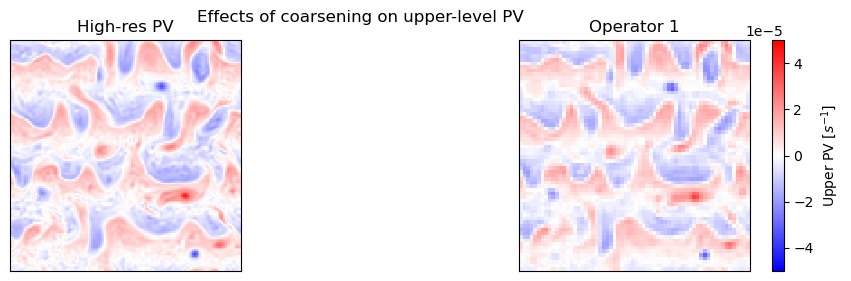

In [20]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on upper-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(jet_model.q[0], 5e-5)
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[0], 5e-5)
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

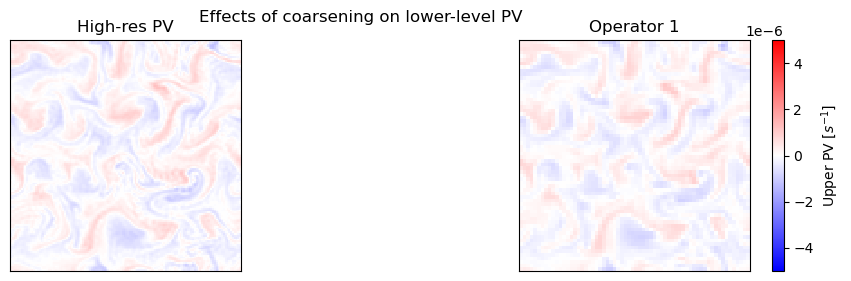

In [21]:
# Visualizing effects on lower-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on lower-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(jet_model.q[1], 5e-6)
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[1], 5e-6)
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

Text(0.5, 0.98, 'Effects on upper PV forcing term')

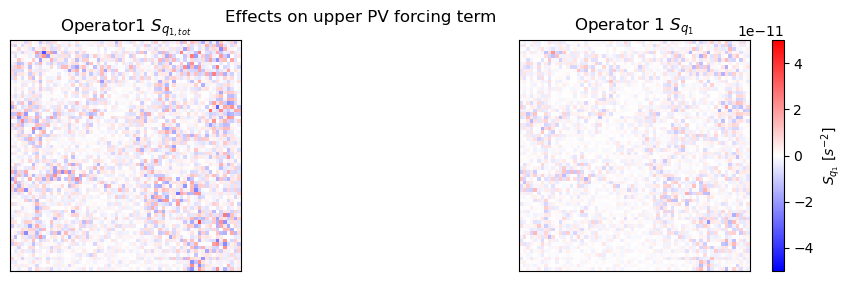

In [22]:
# Visualizing effects on upper PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[0], 3e-11)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[0], 5e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on upper PV forcing term')

Text(0.5, 0.98, 'Effects on lower PV forcing term')

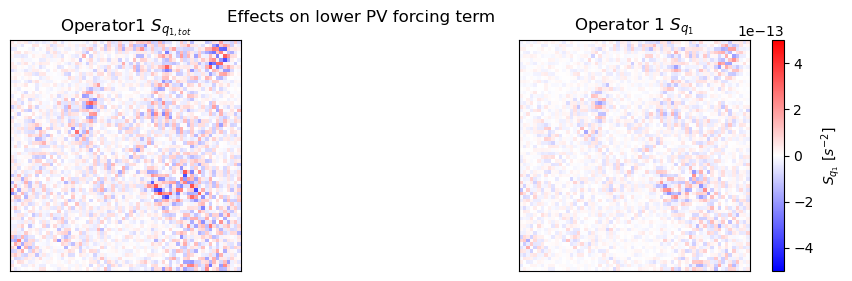

In [25]:
# Visualizing effects on lower PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[1], 3e-13)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[1], 5e-13)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on lower PV forcing term')

## Train FCNN

In [26]:
from pyqg_parameterization_benchmarks.neural_networks import FCNNParameterization, FullyCNN

In [27]:
#if SGS forcing params haven't been added into forcing operator dataset yet

training_ds = op1.m2.to_dataset()
q_subs = op1.subgrid_forcing('q')
q_tot_subs = op1.q_forcing_total
u_subs = op1.subgrid_forcing('u')
v_subs = op1.subgrid_forcing('v')
uu_subs, uv_subs = op1.subgrid_fluxes('u')
vu_subs, vv_subs = op1.subgrid_fluxes('v')
qu_subs, qv_subs = op1.subgrid_fluxes('q')
training_dss = training_ds.assign(q_subgrid_forcing=training_ds['dqdt'] * 0 + q_subs, 
                                  q_forcing_total=training_ds['dqdt'] * 0 + q_tot_subs,
                                  v_subgrid_forcing=training_ds['dqdt'] * 0 + v_subs,
                                  u_subgrid_forcing=training_ds['dqdt'] * 0 + u_subs,
                                  uu_subgrid_flux=training_ds['dqdt'] * 0 + uu_subs,
                                  uv_subgrid_flux=training_ds['dqdt'] * 0 + uv_subs, 
                                  vv_subgrid_flux=training_ds['dqdt'] * 0 + vv_subs, 
                                  uq_subgrid_flux=training_ds['dqdt'] * 0 + qu_subs,
                                  vq_subgrid_flux=training_ds['dqdt'] * 0 + qv_subs)
training_dss

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 0.0
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/23)
    q                  (time, lev, y, x) float64 -5.269e-06 ... 1.282e-07
    u                  (time, lev, y, x) float64 -0.03988 -0.0401 ... -0.00884
    v                  (time, lev, y, x) float64 0.0009063 ... 0.003389
    ufull              (time, lev, y, x) float64 -0.01488 -0.0151 ... -0.00884
    vfull              (time, lev, y, x) float64 0.0009063 ... 0.003389
    qh                 (time, lev, l, k) complex128 (0.002200961969670322+0j)...
    ...                 ...
    u_subgrid_forcing  (time, lev, y, x) float64 -2.602e-09 ... 2.425e-10
    uu_subgrid_flux    (time, lev, y, x) float64 0.0002265 ... 9.158e-06
    uv_subgrid_flux    (time, lev, y, x) float64 7.407e-05 ... -4.598e-09
    vv_subgrid_flux    (time, lev, y, x) float64 0.000281 ... 1.763e-06
    uq_subgrid_flux    (time, lev, y, x) float64 3.418e-08 ... -7.095e-10
    vq_subgrid_flux    (time, lev, y, x) float64 4.517e-08 ... -5.498e-10
Attributes: (12/23)
    pyqg:beta:       1e-11
    pyqg:delta:      0.1
    pyqg:del2:       0.9090909090909091
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [28]:
# save coarsening data to scratch bucket

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
training_dss.to_zarr('gs://leap-scratch/panalluri/jet/coarseningOp1.zarr')  # write data

In [29]:
param = FCNNParameterization.train_on(training_dss, '/home/jovyan/pyqg_parameterization_benchmarks/testing/jet',
                                      inputs=['q', 'u', 'v'], 
                                      targets = ['q_subgrid_forcing']) 

Loss after Epoch 1: 1.274141788482666
Loss after Epoch 2: 1.1573154926300049
Loss after Epoch 3: 1.027144193649292
Loss after Epoch 4: 0.9470798969268799
Loss after Epoch 5: 0.8757268190383911
Loss after Epoch 6: 0.8254261016845703
Loss after Epoch 7: 0.7767968773841858
Loss after Epoch 8: 0.7246077656745911
Loss after Epoch 9: 0.6704258918762207
Loss after Epoch 10: 0.6174193620681763
Loss after Epoch 11: 0.5667241811752319
Loss after Epoch 12: 0.5139886736869812
Loss after Epoch 13: 0.4583801329135895
Loss after Epoch 14: 0.40418142080307007
Loss after Epoch 15: 0.3568669557571411
Loss after Epoch 16: 0.31066757440567017
Loss after Epoch 17: 0.2665921747684479
Loss after Epoch 18: 0.23012031614780426
Loss after Epoch 19: 0.19814810156822205
Loss after Epoch 20: 0.17026600241661072
Loss after Epoch 21: 0.14593705534934998
Loss after Epoch 22: 0.124610535800457
Loss after Epoch 23: 0.10641636699438095
Loss after Epoch 24: 0.0908278077840805
Loss after Epoch 25: 0.07780621200799942
Loss

In [30]:
# Helpers methods to help visualize offline metrics/performance
def imshow(arr):
    plt.imshow(arr, vmin=0, vmax=1, cmap='inferno')
    mean = arr.mean().data
    plt.text(32, 32, f"{mean:.2f}", color=('white' if mean<0.75 else 'black'),
             fontweight='bold', ha='center', va='center', fontsize=16)
    plt.xticks([]); plt.yticks([])
    
def colorbar(label):
    plt.colorbar().set_label(label, fontsize=16,rotation=0,ha='left',va='center')

In [31]:
gcs = fsspec.filesystem('gcs')
jet_forcing1 = xr.open_zarr("gs://leap-persistent/pbluc/jet/forcing1").isel(run=0).load()
jet_forcing1

<xarray.Dataset>
Dimensions:            (l: 64, k: 33, lev: 2, time: 87, y: 64, x: 64, lev_mid: 1)
Coordinates:
  * k                  (k) float32 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float32 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int32 1 2
  * lev_mid            (lev_mid) float32 1.5
  * time               (time) float32 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * x                  (x) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables: (12/36)
    APEflux            (l, k) float32 0.0 1.055e-15 ... 1.072e-28 2.15e-34
    APEgen             float32 5.448e-12
    APEgenspec         (l, k) float32 0.0 6.22e-16 1.072e-14 ... 7.22e-40 -0.0
    Dissspec           (l, k) float32 -0.0 -0.0 -0.0 ... -4.884e-27 2.057e-32
    EKE                (lev) float32 0.001501 5.79e-05
    EKEdiss            float32 7.369e-12
    ...                 ...
    uv_subgrid_flux    (time, lev, y, x) float32 nan nan nan nan ... nan nan nan
    v                  (time, lev, y, x) float32 nan nan nan nan ... nan nan nan
    v_subgrid_forcing  (time, lev, y, x) float32 nan nan nan nan ... nan nan nan
    vfull              (time, lev, y, x) float32 nan nan nan nan ... nan nan nan
    vq_subgrid_flux    (time, lev, y, x) float32 nan nan nan nan ... nan nan nan
    vv_subgrid_flux    (time, lev, y, x) float32 nan nan nan nan ... nan nan nan
Attributes: (12/26)
    hires:           256
    lores:           64
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       1e-11
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg_params:     {"nx": 64, "dt": 3600.0, "tmax": 311040000.0, "tavestart...
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           Subgrid forcing dataset generated by coarsening nx=256 p...

## Offline testing

In [32]:
preds1 = param.test_offline(training_dss)
preds1

<xarray.Dataset>
Dimensions:                                 (time: 1, lev: 2, y: 64, x: 64)
Coordinates:
  * time                                    (time) float64 0.0
  * lev                                     (lev) int64 1 2
  * x                                       (x) float64 7.812e+03 ... 9.922e+05
  * y                                       (y) float64 7.812e+03 ... 9.922e+05
Data variables: (12/14)
    q_subgrid_forcing                       (time, lev, y, x) float64 1.667e-...
    q_subgrid_forcing_predictions           (time, lev, y, x) float64 6.171e-...
    q_subgrid_forcing_spatial_mse           (lev, y, x) float64 1.102e-24 ......
    q_subgrid_forcing_temporal_mse          (time, lev) float64 6.313e-25 4.8...
    q_subgrid_forcing_mse                   (lev) float64 6.313e-25 4.877e-29
    q_subgrid_forcing_spatial_skill         (lev, y, x) float64 0.6034 ... 0.465
    ...                                      ...
    q_subgrid_forcing_spatial_correlation   (lev, y, x) float64 nan nan ... nan
    q_subgrid_forcing_temporal_correlation  (time, lev) float64 0.9804 0.9872
    q_subgrid_forcing_correlation           (lev) float64 0.9804 0.9872
    correlation                             (lev) float64 0.9804 0.9872
    mse                                     (lev) float64 6.313e-25 4.877e-29
    skill                                   (lev) float64 0.9612 0.9745
Attributes: (12/23)
    pyqg:beta:       1e-11
    pyqg:delta:      0.1
    pyqg:del2:       0.9090909090909091
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

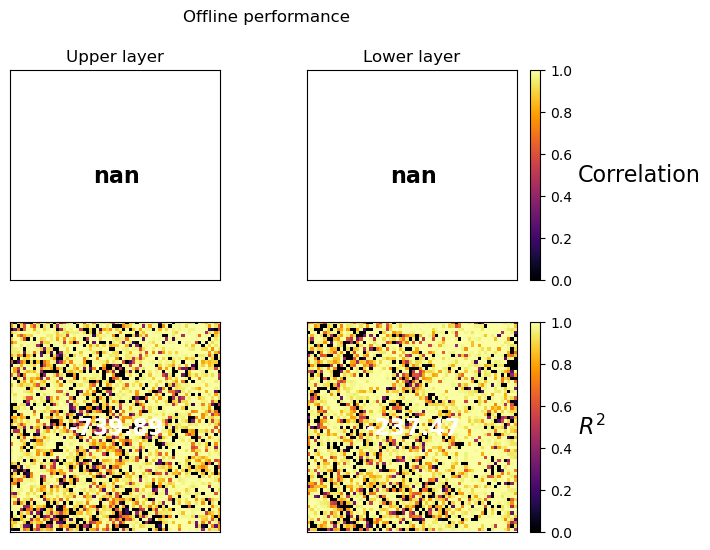

In [33]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds1.q_subgrid_forcing_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds1.q_subgrid_forcing_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

## Online testing

In [ ]:
import json
jet_forcing1 = xr.open_zarr("gs://leap-persistent/pbluc/jet/forcing1").isel(run=0).load()
param_run = param.run_online(**json.loads(jet_forcing1.pyqg_params))

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 4.54e-05, CFL: 0.027
INFO: Step: 2000, Time: 7.20e+06, KE: 1.34e-04, CFL: 0.042
INFO: Step: 3000, Time: 1.08e+07, KE: 1.90e-04, CFL: 0.052
INFO: Step: 4000, Time: 1.44e+07, KE: 2.36e-04, CFL: 0.056
INFO: Step: 5000, Time: 1.80e+07, KE: 2.48e-04, CFL: 0.049
INFO: Step: 6000, Time: 2.16e+07, KE: 2.51e-04, CFL: 0.045
INFO: Step: 7000, Time: 2.52e+07, KE: 2.41e-04, CFL: 0.049
INFO: Step: 8000, Time: 2.88e+07, KE: 2.31e-04, CFL: 0.047
INFO: Step: 9000, Time: 3.24e+07, KE: 2.10e-04, CFL: 0.041
INFO: Step: 10000, Time: 3.60e+07, KE: 2.03e-04, CFL: 0.038
INFO: Step: 11000, Time: 3.96e+07, KE: 1.87e-04, CFL: 0.047
INFO:

In [36]:
param_run

<xarray.Dataset>
Dimensions:            (time: 87, lev: 2, y: 64, x: 64, lev_mid: 1, l: 64, k: 33)
Coordinates:
  * time               (time) float64 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/27)
    q                  (time, lev, y, x) float64 2.307e-07 ... -1.75e-07
    u                  (time, lev, y, x) float64 0.0 0.0 ... 0.003897 0.001993
    v                  (time, lev, y, x) float64 0.0 0.0 ... 0.0001264 0.001608
    ufull              (time, lev, y, x) float64 0.025 0.025 ... 0.001993
    vfull              (time, lev, y, x) float64 0.0 0.0 ... 0.0001264 0.001608
    Ubg                (time, lev) float64 0.025 0.0 0.025 0.0 ... 0.0 0.025 0.0
    ...                 ...
    ENSgenspec         (time, l, k) float64 nan nan nan ... 5.146e-53 -1.473e-61
    ENSfrictionspec    (time, l, k) float64 nan nan ... -3.915e-52 -1.236e-61
    APEgenspec         (time, l, k) float64 nan nan nan ... 1.158e-44 -3.315e-53
    APEflux            (time, l, k) float64 nan nan nan ... 2.016e-29 4.724e-34
    KEflux             (time, l, k) float64 nan nan nan ... 1.081e-27 2.173e-32
    APEgen             (time) float64 nan nan nan ... 5.527e-12 5.671e-12
Attributes: (12/23)
    pyqg:beta:       1e-11
    pyqg:delta:      0.1
    pyqg:del2:       0.9090909090909091
    pyqg:dt:         3600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [ ]:
jet_model_highRes = xr.open_zarr("gs://leap-scratch/panalluri/jet/highRes.zarr") 
jet_model_lowRes = xr.open_zarr("gs://leap-scratch/panalluri/jet/lowRes.zarr") 
jet_model_lowRes

In [ ]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(15.5,3))
plt.subplot(1,4,1, title='KE flux')
plt.semilogx(jet_model_highRes.KEflux.k, jet_model_highRes.KEflux.mean(dim='l').transpose(), label="High-res")
plt.semilogx(jet_model_lowRes.KEflux.k, jet_model_lowRes.KEflux.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.KEflux.k, param_run.KEflux.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,2, title='APE flux')
plt.semilogx(jet_model_highRes.APEflux.k, jet_model_highRes.APEflux.mean(dim='l').transpose(), label="High-res")
plt.semilogx(jet_model_lowRes.APEflux.k, jet_model_lowRes.APEflux.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.APEflux.k, param_run.APEflux.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,3, title='APE gen spec')
plt.semilogx(jet_model_highRes.APEgenspec.k, jet_model_highRes.APEgenspec.mean(dim='l').transpose(), label="High-res")
plt.semilogx(jet_model_lowRes.APEgenspec.k, jet_model_lowRes.APEgenspec.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.APEgenspec.k, param_run.APEgenspec.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,4, title='KE friction spec')
plt.semilogx(jet_model_highRes.KEfrictionspec.k, jet_model_highRes.KEfrictionspec.mean(dim='l').transpose(), label="High-res")
plt.semilogx(jet_model_lowRes.KEfrictionspec.k, jet_model_lowRes.KEfrictionspec.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.KEfrictionspec.k, param_run.KEfrictionspec.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()